# Proyek Analisis Data: [*Bike Sharing Dataset*]
- **Nama:** [Rama Syailana Dewa]
- **Email:** [ramasyailana3@gmail.com]
- **ID Dicoding:** [masdewa]

## Menentukan Pertanyaan Bisnis

- Apakah cuara berpengaruh terhadap jumalah pengguna sepeda?
- Bagaimana tren penggunaan sepeda dalam tahun 2011 dan 2012 mana yang lebih unggul ?
- Bagaimana pengaruh temp, atemp serta humidity terhadap jumlah total pengguna sepeda ?
- apakah ada pengaruh musim terhadap penyewa sepeda baik Casual dan Registered ?

## Import Semua Packages/Library yang Digunakan

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Mengimport semua library yang dibutuhkan dalam Analisis Data

## Data Wrangling

### Gathering Data

**Load tabel day**

In [47]:
day_df = pd.read_csv("./Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Load tabel hr**

In [48]:
hr_df = pd.read_csv("./Bike-sharing-dataset/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hr.csv

### Assessing Data

**Asses day_df**

1. Mengecek tipe data day_df

In [49]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Mengecek apakah ada missing values

In [50]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Mengecek apakah ada duplicate data

In [51]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [52]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Asses hr_df**

1. Mengecek tipe data hr_df

In [53]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Mengecek apakah ada missing values

In [54]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Mengecek apakah ada duplicate data

In [55]:
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [56]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

**day_df**
- Terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime
- Dapat kita simpulkan bahwa tabel day_df tidak ada missing values, berarti aman.
- Pada tabel day_df terdapat 0 data yang double, artinya semua data bersifat unik.
- Tidak ada keanehan pada nilai statistiknya.

**hr_df**

- Terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime
- Dapat kita simpulkan bahwa tabel hr_df tidak ada missing values, berarti aman
- Pada tabel day_df terdapat 0 data yang double, artinya semua data bersifat unik.
- Tidak ada keanehan pada nilai statistiknya.

Dapat kita simpulkan bahwa untuk assesing data pada day_df dan hr_df ini mirip



### Cleaning Data

1. Menghapus tabel yang tidak diperlukan

Sekarang kita akan menghapus terlebih dahulu tabel hr. dikarenakan tidak releban dengan pertanyaan bisnis yang sudah kita tetapkan dan juga tabel hr dan day itu bedanya hanya dikolom hrnya saja, selebeihnya sama.

In [57]:
del hr_df

2. Menghapus beberapa kolom yang tidak akan digunakan

berdasarkan pertanyaan bisnis kita, untuk kolom yang akan di drop, yakni:

- instant : karena indesk catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed : karena tidak relevan dengan pertanyaan tidak efek ada kecepatan angin terhadap jumlah penyewa

In [58]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah beberapa detail tentang kolom

Karena nama dari kolom diatas kurang enak untuk dibaca, saya lebih suka dengan tipe data yang bentuknya kategorical, jadi saya akan merubah angkanya, dan ada tipe data yang tidak sesuai juga. saya akan merubah itu.

In [59]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [60]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [61]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [62]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,NaN,0,NaN,0,NaN,0,NaN,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,NaN,0,NaN,0,NaN,0,NaN,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,NaN,0,NaN,0,NaN,1,NaN,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,NaN,0,NaN,0,NaN,1,NaN,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,NaN,0,NaN,0,NaN,1,NaN,0.226957,0.229270,0.436957,82,1518,1600


In [63]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        0 non-null      category      
 2   year          731 non-null    category      
 3   month         0 non-null      category      
 4   holiday       731 non-null    category      
 5   weekday       0 non-null      category      
 6   workingday    731 non-null    category      
 7   weather_cond  0 non-null      category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 45.9 KB


**Insight:**
- Jadi kita sudah menilai data day_df, untuk kita explore agar dapat menjawab pertanyaan bisnis yang kita tuliskan diawal.
- Yang telah kita rubah :
1. Nama kolom
2. Mengubah nilai angka kolom 'month','season','weekday','weather_cond' menjadi string/kata
3. Mengubah tipe data pada kolom 'dateday' menjadi datetime
4. Mengubah data menjadi categorical



## Exploratory Data Analysis (EDA)

### Explore day_df

1. Mengelompokkan penyewa sepeda baik casual dan registered berdasarkan bulan

In [64]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

Empty DataFrame
Columns: [(count, max), (count, min), (count, mean), (count, sum)]
Index: []

2. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan cuaca

In [65]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

Empty DataFrame
Columns: [(count, max), (count, min), (count, mean), (count, sum)]
Index: []

3. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan holiday

In [66]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

4. Membandingkan penyewa sepeda pada saat weekday dan weekend

In [67]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

Empty DataFrame
Columns: [(count, max), (count, min), (count, mean)]
Index: []

5. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan workingday

In [68]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

6. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan season

In [69]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

Empty DataFrame
Columns: [(casual, mean), (registered, mean), (count, max), (count, min), (count, mean)]
Index: []

7. Kelompokkan temp, hum, dan humidity berdasarkan season

In [70]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

Empty DataFrame
Columns: [(temp, max), (temp, min), (temp, mean), (atemp, max), (atemp, min), (atemp, mean), (hum, max), (hum, min), (hum, mean)]
Index: []

8. Mengetahui hubungan antara penyewa casual, registered dan count

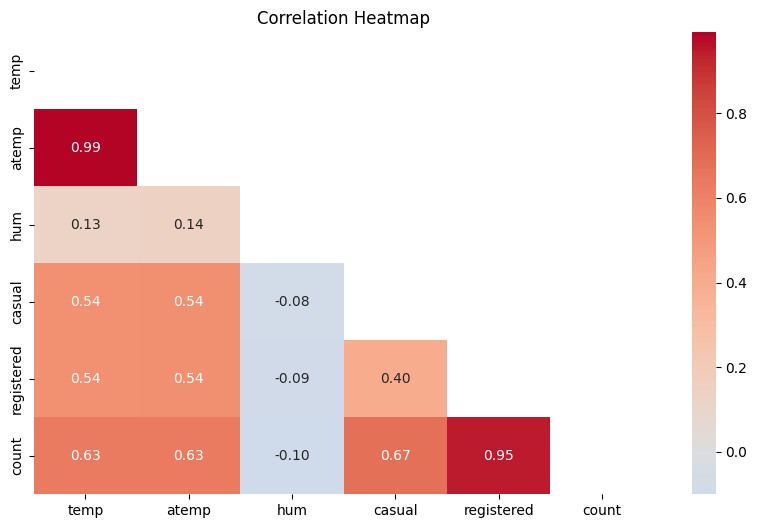

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

- Dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

- Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

- Jumlah penyewaan sepeda terbesar jatuh kepada workingday atau hari kerja dibandingkan dengan hari non-workingday. Namun dapat kita lihat juga, hasilnya lumayan berbeda walaupun tidak banyal.

- Para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

- Berdasarkan hasil analisis pengelompokan temp,atemp dan hum berdasarkan season, dapat disimpulkan beberapa pernyataan sebagai berikut:
   
    Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring.
    Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang selanjutnya diikuti oleh fall, summer, dan spring.

- Berdasarkan hasil analisis heatmap, didapat pernyataan sebagai berikut:
   
    atemp dan temp sangat berkorelasi (0.99).
    hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
    casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).
    registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).
    count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 1 : Apakah cuara berpengaruh terhadap jumalah pengguna sepeda?


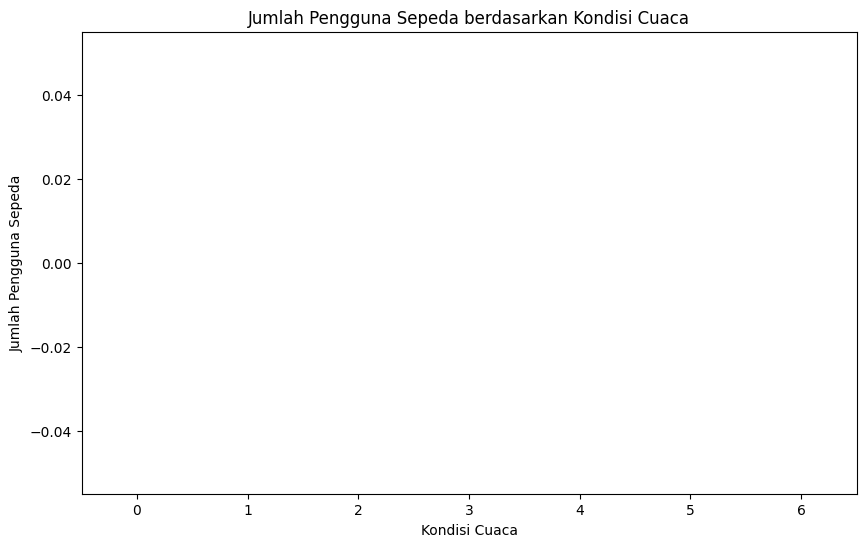

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 2 : Bagaimana tren penggunaan sepeda dalam tahun 2011 dan 2012 mana yang lebih unggul ?

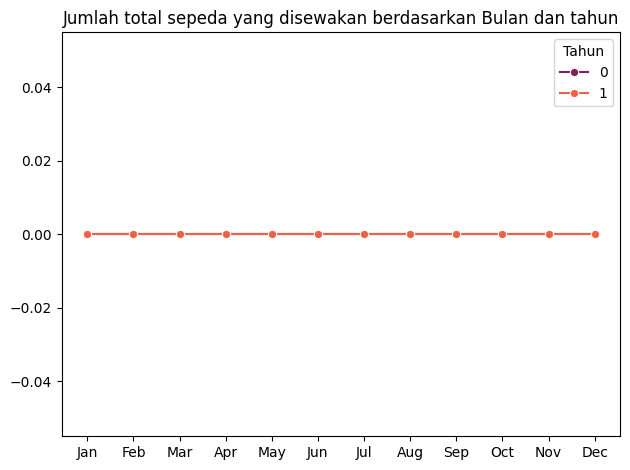

In [73]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Bagaimana pengaruh temp, atemp serta humidity

Text(0.5, 1.0, 'Humidity vs Count')

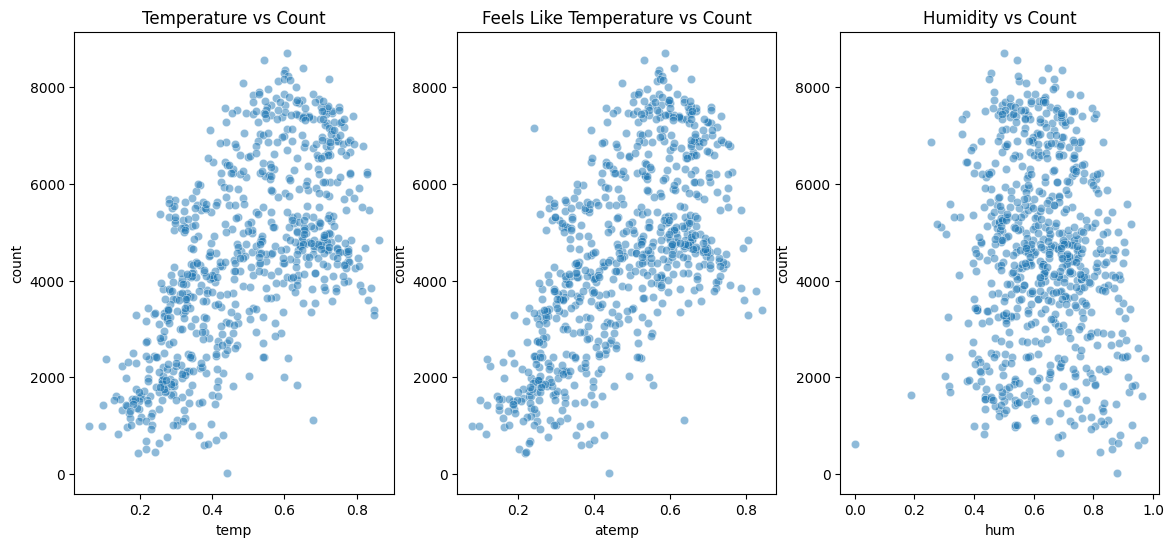

In [74]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

### Pertanyaan 4 : Apakah ada pengaruh musim terhadap penyewa sepeda baik Casual dan Registered ?

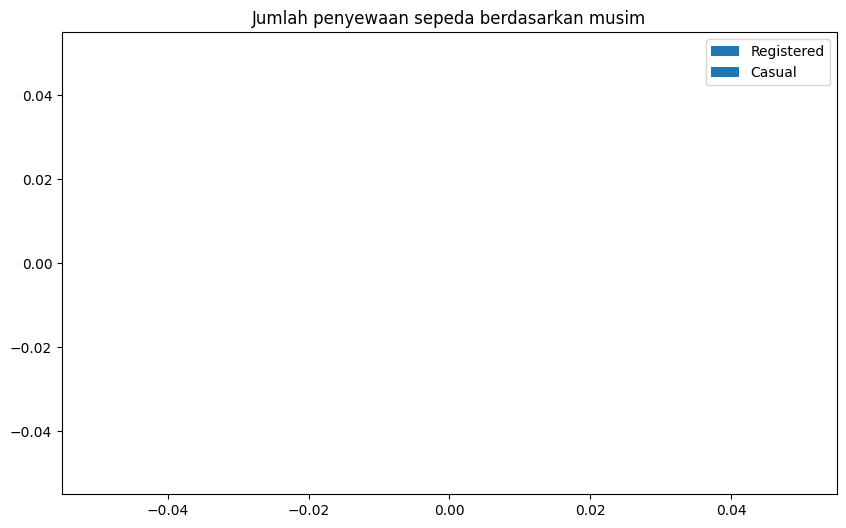

In [75]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

**Insight:**
- Pertanyaan 1 : Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut/mendung, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.
- Pertanyaan 2 : Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa tahun 2012 (yang diwakili oleh angka 1) jelas menang unggul baik dari januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

- Pertanyaan 3 : Berdasarkan hasil analisis diatas menggunakan scatter plot, dapat kita tarik pernyataan sebagai berikut:

    - Hubungan antara temp dan count ternyata menunjukan korelasi yang positif diantara dua variabel.
    - Hubungan antara atemp dan count ternyata juga menunjukan korelasi yang positif diantara dua variabel.
    - Hubungan antara hum dan count ternyata menunjukan korelasi yang sedikit negatif, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu nampak.
  
      Kesimpulannya jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Dan pengaruh dari humidity sepertinya sangat kecil disini, walaupun cenderung dapat menurunkan jumlah pengguna sepeda.

- Pertanyaan 4 : Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah musim gugur (Fall), lalu diikuti dengan musim panas (Summer), musim dingin (Winter), dan diakhiri dengan musim semi (Spring).

## Conclusion

- Conclution pertanyaan 1 : Dapat terlihat jelas terdapat hubungan diantara keduanya. Para penyewa sepeda sangat menyukai ketika cuaca sedang Cerah/Sedikit mendung dengan Q3 diatas 6000 dan Q1 kurang dari 4000 serta mediannya hampir 5000. Lalu posisi kedua ditempati ketika cuaca sedang Berkabut/Mendung dengan Q3 diatas 5000 dan Q1 dibawah 3000 serta mediannya diatas 4000. Terakhir pengguna kurang menyukai ketika suasana sedang Sedikit bersalju/Hujan dengan Q3 diatas 2000 dan Q1 dibawah 1000 serta mediannya diatas 1000. Dan untuk cuaca ketika Badai Besar tidak ada datanya, karena memang tidak memungkinan untuk bersepeda ketika kondisi cuaca semacam itu.
- Conclution pertanyaan 2 : Pada visualisasi kali ini, dapat kita amati pada kedua tahun yakni 2011 dan 2012, terjadi perbedaan puncak dan dasar bulan pada kedua tahun tersebut. Puncak dari tahun 2011 berada pada bulan Juni dan dasarnya berada pada bulan Januari. Sedangkan Puncak dari tahun 2012 terdapat pada bulan September dan dasarnya sama yakni bulan Januari. Dan dari kedua visualisasi tersebut dapat kita amati bahwa jumlah total sepeda yang disewakan pada tahun 2012, seluruhnya lebih tinggi daripada pada tahun 2011.
- Conclution pertanyaan 3 : Dari 3 visualisasi yang ditampilkan, dapat disimpulkan bahwa temp dan atemp memiliki korelasi positif dengan count, sehingga jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Terbalik dengan Humidity yang memiliki korelasi negatif dengan count walaupun sangat minim (tidak terlalu signifikan), tetapi tetap dapat menurunkan jumlah pengguna sepeda ketika humiditynya meningkat.
- Conclution pertanyaan 4 : Pada visualisasi terakhir, ternyata hasil yang didapatkan cukup mengejutkan dimana musim dingin (Winter) tidak menjadi yang terakhir, melainkan yang terakhir adalah musin semi (Spring). Hal ini bisa diakibatkan oleh banyak faktor seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain. Sedangkan urutan pertamanya ditempati oleh musim gugur (Fall) yang mampu meraih penyewaan sepeda sebanyak lebih dari 800000.